In [1]:
%matplotlib inline
import tweepy
import time
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
Targets = ["@CBSNews", "@cnnbrk", "@FoxNews","@BBCNews", "@nytimes"]


# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

users = []
dates = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
counters = []
text_list = []

for target in Targets:

    oldest_tweet = None
    counter = 1
    for x in range(5):
            
            public_tweets = api.user_timeline(
            target, count=20, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
            for tweet in public_tweets:
                    try:
            
                            counter += 1
                            oldest_tweet = tweet["id"] - 1
                            results = analyzer.polarity_scores(tweet["text"])
                            
                            users.append(target)
                            dates.append(tweet["created_at"])
                            counters.append(counter) 
                            compound_list.append(results["compound"])
                            positive_list.append(results["pos"])
                            negative_list.append(results["neg"])
                            neutral_list.append(results["neu"])
                            text_list.append(tweet["text"])



                     
                    except tweepy.TweepError:
                        print("Failed to run the command on that user, Skipping...")


In [4]:
colors = ["teal", "green", "red", "blue", "yellow"]
sentiments = {"User" : users,
    "Date": dates, 
    "Compound": compound_list,
    "Positive": positive_list,
    "Negative": negative_list,
    "Neutral": neutral_list,
    "Tweets Ago": counters,
    "Text" : text_list}
Sentiments = pd.DataFrame(sentiments)
Sentiments.head()

,User,Date,Compound,Positive,Negative,Neutral,Tweets Ago,Text
0,@CBSNews,Fri Oct 05 04:33:04 +0000 2018,0.0000,0.000,0.000,1.000,2,"Red tide closes Florida beaches, could impact ..."
1,@CBSNews,Fri Oct 05 04:18:03 +0000 2018,-0.3182,0.147,0.207,0.645,3,"Man killed in car explosion with son, friend s..."
2,@CBSNews,Fri Oct 05 04:03:03 +0000 2018,-0.6705,0.000,0.290,0.710,4,"Michelle Carter ""texting suicide"" case heard b..."
3,@CBSNews,Fri Oct 05 03:54:05 +0000 2018,0.0000,0.000,0.000,1.000,5,Richard Spencer's alt-group group regains tax-...
4,@CBSNews,Fri Oct 05 03:48:03 +0000 2018,-0.2960,0.000,0.180,0.820,6,What's missing from the FBI's investigation in...


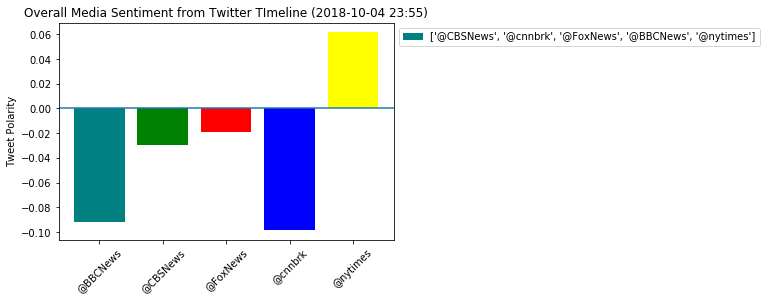

In [27]:
averages = Sentiments.groupby("User").mean()
averages = pd.DataFrame(averages["Compound"])
averages = averages.reset_index()
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")


plt.bar(averages.User, averages.Compound, color=colors, label=Targets)

plt.title(f"Overall Media Sentiment from Twitter TImeline ({now})")

plt.xticks(rotation=45)
plt.ylabel("Tweet Polarity")
plt.axhline(0)
plt.savefig('OverallSentiment.png')
plt.legend(loc=0, bbox_to_anchor=(1,1))

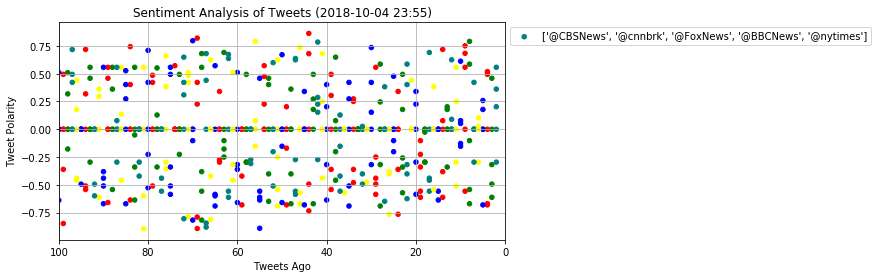

In [28]:

Sentiments.plot.scatter("Tweets Ago", "Compound", color=colors, figsize=(8, 4), subplots=False, grid=True,  label=Targets)

plt.title(f"Sentiment Analysis of Tweets ({now})")
plt.xlim(100,0)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig('100TweetSentiment.png')
plt.legend(loc=0, bbox_to_anchor=(1,1))